In [1]:
import keras
from keras import layers
from keras.callbacks import EarlyStopping

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

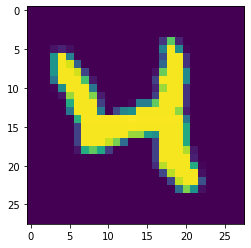

In [4]:
plt.imshow(x_train[20])

In [5]:
def model_build_test(no_of_layers, epochs=10):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for _ in range(no_of_layers):
        model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.build()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # model.summary()
    
    model.fit(x_train, y_train, epochs=10, callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=3)], verbose=0)
    
    return model.evaluate(x_test, y_test, verbose=0)[1]

In [8]:
for i in [0, 1, 2, 5, 10, 30, 50, 100]:
    print(f'Layers {i} acc: ', end='')
    print(model_build_test(i))

Layers 0 acc: 0.8928999900817871
Layers 1 acc: 0.9424999952316284
Layers 2 acc: 0.955299973487854
Layers 5 acc: 0.9717000126838684
Layers 10 acc: 0.9642000198364258
Layers 30 acc: 0.7263000011444092
Layers 50 acc: 0.11349999904632568
Layers 100 acc: 0.11349999904632568


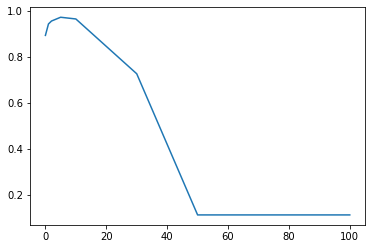

In [11]:
plt.plot([0, 1, 2, 5, 10, 30, 50, 100],
         [0.8928999900817871, 0.9424999952316284, 0.955299973487854, 0.9717000126838684, 0.9642000198364258, 0.7263000011444092, 0.11349999904632568, 0.11349999904632568])